In [10]:
import pandas as pd

# Load CSV files into DataFrames
books_df = pd.read_csv('Books.csv', low_memory=False)
ratings_df = pd.read_csv('ratings.csv')
users_df = pd.read_csv('Users.csv')

In [11]:
# Check dimensions of each DataFrame
print("Books DataFrame shape:", books_df.shape)
print("Ratings DataFrame shape:", ratings_df.shape)
print("Users DataFrame shape:", users_df.shape)

# Print column names
print("Books columns:", books_df.columns)
print("Ratings columns:", ratings_df.columns)
print("Users columns:", users_df.columns)

# Display first few rows of each DataFrame
print("Books DataFrame head:\n", books_df.head())
print("Ratings DataFrame head:\n", ratings_df.head())
print("Users DataFrame head:\n", users_df.head())

Books DataFrame shape: (271360, 8)
Ratings DataFrame shape: (1149780, 3)
Users DataFrame shape: (278858, 3)
Books columns: Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
Ratings columns: Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')
Users columns: Index(['User-ID', 'Location', 'Age'], dtype='object')
Books DataFrame head:
          ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press

In [12]:
# Check for missing values
print("Missing values in Books DataFrame:\n", books_df.isnull().sum())
print("Missing values in Ratings DataFrame:\n", ratings_df.isnull().sum())
print("Missing values in Users DataFrame:\n", users_df.isnull().sum())

Missing values in Books DataFrame:
 ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
Missing values in Ratings DataFrame:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
Missing values in Users DataFrame:
 User-ID          0
Location         0
Age         110762
dtype: int64


In [13]:
# Handle missing values in Books DataFrame
books_df['Book-Author'].fillna(books_df['Book-Author'].mode()[0], inplace=True)
books_df['Publisher'].fillna(books_df['Publisher'].mode()[0], inplace=True)
books_df.dropna(subset=['Image-URL-L'], inplace=True)  # Drop rows with missing Image-URL-L values

# Handle missing values in Users DataFrame
# Impute missing values in Age column with median age
median_age = users_df['Age'].median()
users_df['Age'].fillna(median_age, inplace=True)

In [5]:
# validate againfor missing values
print("Missing values in Books DataFrame:\n", books_df.isnull().sum())
print("Missing values in Ratings DataFrame:\n", ratings_df.isnull().sum())
print("Missing values in Users DataFrame:\n", users_df.isnull().sum())

Missing values in Books DataFrame:
 ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64
Missing values in Ratings DataFrame:
 276725        0
034545104X    0
0             0
dtype: int64
Missing values in Users DataFrame:
 User-ID     0
Location    0
Age         0
dtype: int64


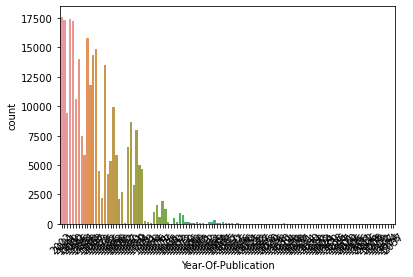

In [14]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt  # Add this line to import matplotlib.pyplot

# Example of creating a bar plot for the 'Year-Of-Publication' column
sns.countplot(data=books_df, x='Year-Of-Publication')
plt.xticks(rotation=45)
plt.show()

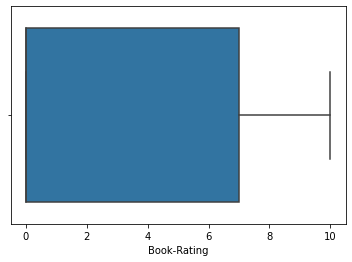

In [15]:
# Example of creating a box plot for the 'Book-Rating' column in the Ratings DataFrame
sns.boxplot(data=ratings_df, x='Book-Rating')
plt.show()

Correlation matrix for Ratings DataFrame:
               User-ID  Book-Rating
User-ID      1.000000    -0.046944
Book-Rating -0.046944     1.000000


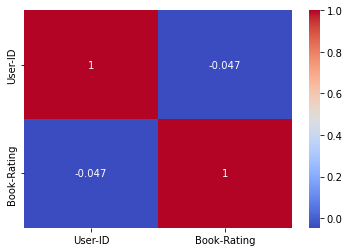

In [16]:
# Correlation matrix for numerical features
print("Correlation matrix for Ratings DataFrame:\n", ratings_df.corr())

# Visualization of correlations using heatmap
import seaborn as sns
sns.heatmap(ratings_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [17]:
# Merge DataFrames based on common keys (ISBN and User-ID)
merged_df = pd.merge(ratings_df, books_df, on='ISBN')
merged_df = pd.merge(merged_df, users_df, on='User-ID')

In [18]:
#feature engineering: Creating a feature for total ratings per user
user_rating_counts = merged_df.groupby('User-ID')['Book-Rating'].count().reset_index()
user_rating_counts.columns = ['User-ID', 'Total-Ratings']
merged_df = pd.merge(merged_df, user_rating_counts, on='User-ID', how='left')

In [19]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
train_df, test_df = train_test_split(merged_df, test_size=0.2, random_state=42)

In [20]:
# Import necessary libraries
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [21]:
# Step 1: Load and prepare the data

# Define a Reader object specifying the rating scale
reader = Reader(rating_scale=(1, 10))

# Load data from DataFrame (train_df) into a Surprise Dataset object
data = Dataset.load_from_df(train_df[['User-ID', 'ISBN', 'Book-Rating']], reader)

# Split the data into train and test sets (80% train, 20% test)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [22]:
# Step 2: Initialize and train the recommendation model

# Initialize the Singular Value Decomposition (SVD) algorithm
model = SVD()

# Train the model on the training set
model.fit(trainset)

In [23]:
# Step 3: Make predictions on the test set

# Get predictions for the test set
predictions = model.test(testset)

In [24]:
# Step 4: Evaluate the model

# Calculate Root Mean Squared Error (RMSE) to evaluate model accuracy
rmse = accuracy.rmse(predictions)
print("RMSE:", rmse)

RMSE: 3.4945
RMSE: 3.494544006136877


In [27]:
# Import the mae function from the accuracy module
from surprise.accuracy import mae

# Calculate Mean Absolute Error (MAE)
mae_score = mae(predictions)
print("MAE:", mae_score)

MAE:  2.9301
MAE: 2.9300751519255663
